In [ ]:
# !pip install -U transformers
# !pip install -U accelerate
# !pip install -U datasets
# !pip install -U bertviz
# !pip install -U umap-learn

In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !pip install beautifulsoup4
# !pip install textblob
# !pip install mlxtend
# !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Combined Data.csv")

In [ ]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df['status'].value_counts()

,count
status,
Normal,16351
Depression,15404
Suicidal,10652
Anxiety,3888
Bipolar,2877
Stress,2669
Personality disorder,1201


In [ ]:
df = df.dropna()

In [ ]:
print(f"The data has {df['statement'].duplicated().sum()} duplicated rows.")

df = df.drop_duplicates(subset='statement')

The data has 1612 duplicated rows.


In [ ]:
df['status'].value_counts()

,count
status,
Normal,16039
Depression,15085
Suicidal,10638
Anxiety,3617
Bipolar,2501
Stress,2293
Personality disorder,895


In [ ]:
df['length'] = df['statement'].apply(lambda x: len(x.split()))
df['length'].describe()

,length
count,51068.000000
mean,112.551441
std,161.766547
min,1.000000
25%,15.000000
50%,61.000000
75%,147.000000
max,5419.000000


In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Define custom stopwords, adding specific words like "ive", "im", etc.
    custom_stopwords = set(stopwords.words('english')).union({'ive', 'im', 'dont', 'youre', 'ill', 'cant', 'wont'})

    # Remove stopwords and custom unwanted words
    words = [word for word in words if word not in custom_stopwords]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the processed words back into a single string
    processed_text = ' '.join(words)

    return processed_text

# Apply preprocessing to the 'statement' column
df['processed_statement'] = df['statement'].apply(preprocess_text)

# Display the DataFrame with the processed text
print(df[['statement', 'processed_statement']])

                                               statement  \
0                                             oh my gosh   
1      trouble sleeping, confused mind, restless hear...   
2      All wrong, back off dear, forward doubt. Stay ...   
3      I've shifted my focus to something else but I'...   
4      I'm restless and restless, it's been a month n...   
...                                                  ...   
52836  Anxiety cause faintness when standing up ? As ...   
52837  anxiety heart symptom does anyone else have th...   
52838  Travel Anxiety Hi all! Long time anxiety suffe...   
52840  fomo from things i’m not involved in does anyo...   
52841  Getting through the day How do you get  anythi...   

                                     processed_statement  
0                                                oh gosh  
1      trouble sleeping confused mind restless heart ...  
2      wrong back dear forward doubt stay restless re...  
3             shifted focus something else 

In [ ]:
df.head()

,Unnamed: 0,statement,status,length,processed_statement
0,0,oh my gosh,Anxiety,3,oh gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,trouble sleeping confused mind restless heart ...
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,wrong back dear forward doubt stay restless re...
3,3,I've shifted my focus to something else but I'...,Anxiety,11,shifted focus something else still worried
4,4,"I'm restless and restless, it's been a month n...",Anxiety,14,restless restless month boy mean


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
statement,0
status,0
length,0
processed_statement,0


In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
# Independent variables (X) and dependent variable (y)
X = df[['Unnamed: 0', 'statement', 'length','processed_statement']]  # Features
y = df['status']  # Target

# Display original class distribution
print(f"Original class distribution: {Counter(y)}")

# Create the undersampler
rus = RandomUnderSampler(random_state=42)

# Perform undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert the resampled data back into a DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Display the resampled class distribution
print(f"Resampled class distribution: {Counter(y_resampled)}")

# Display the resampled DataFrame
print(df_resampled)

Original class distribution: Counter({'Normal': 16039, 'Depression': 15085, 'Suicidal': 10638, 'Anxiety': 3617, 'Bipolar': 2501, 'Stress': 2293, 'Personality disorder': 895})
Resampled class distribution: Counter({'Anxiety': 895, 'Bipolar': 895, 'Depression': 895, 'Normal': 895, 'Personality disorder': 895, 'Stress': 895, 'Suicidal': 895})
      Unnamed: 0                                          statement  length  \
34235      34234  Fear of getting schizophrenia or any mental il...     168   
34692      34691  My mind is tricking me into feeling like I nee...     201   
35452      35451  Dont know whats wrong with me I really can't b...     178   
51951      51950  A reminder that progress isn't linear and that...      78   
52588      52587  Just had one of the worst anxiety attacks of m...     185   
...          ...                                                ...     ...   
17644      17643  I am feeling very suicidal. I do not want to d...     149   
20362      20361  I need i

In [ ]:
df_resampled.sample(10)

,Unnamed: 0,statement,length,processed_statement,status
30029,30028,And he said that he had some deep feelings for...,65,said deep feeling suggested meeting another ti...,Stress
16909,16908,And coming from someone who is super introvert...,223,coming someone super introverted usually find ...,Depression
48581,48580,exam stress i’m just looking for some words of...,133,exam stress looking word kindness experience g...,Stress
50668,50667,How do you deal with making mistakes? Like bre...,100,deal making mistake like breaking stuff thats ...,Personality disorder
49887,49886,"When manic, do any of you have trouble reading...",159,manic trouble reading body language facial exp...,Bipolar
51504,51503,Adrian from the movie Rocky [https://www.youtu...,25,adrian movie rocky httpswwwyoutubecomwatchvoyg...,Personality disorder
34091,34090,Flu Fear! Oh boy. It's DEFINITELY that time of...,195,flu fear oh boy definitely time year time year...,Anxiety
42271,42270,i miss being at home for calving season sad th...,21,miss home calving season sad black one died mo...,Normal
51488,51487,Is anyone else full of love but unable to expr...,135,anyone else full love unable express anyone el...,Personality disorder
48762,48761,Puss on throat from stress / anxiety..anyone e...,90,pus throat stress anxietyanyone else experienc...,Stress


In [ ]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline

In [ ]:
# Count the number of each status
status = df_resampled['status'].value_counts()
total = status.values.sum()

status_percentage = [f"{round(i/total*100,2)}%" for i in status.values]
status_percentage

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(x=status.index, y=status.values, text=status_percentage, textposition='auto'))
fig.update_layout(title='Status Distribution', xaxis_title='Status', yaxis_title='Count')
fig.show()

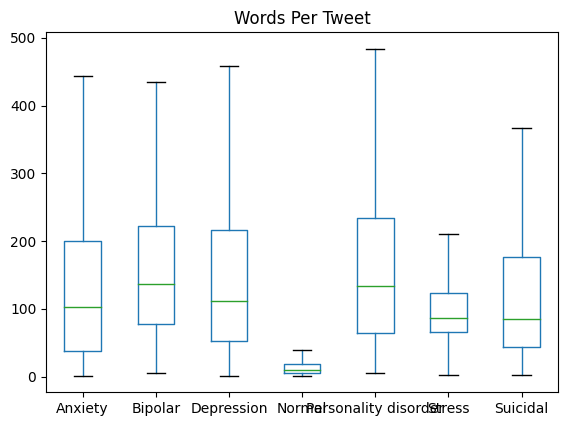

In [ ]:
df_resampled['Words Per Tweet'] = df_resampled['statement'].str.split().apply(len)
df_resampled.boxplot('Words Per Tweet', by='status', grid=False, showfliers=False)
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df_resampled['status_encoded'] = label_encoder.fit_transform(df_resampled['status'])

In [ ]:
df_resampled.columns

Index(['Unnamed: 0', 'statement', 'length', 'processed_statement', 'status',
       'Words Per Tweet', 'status_encoded'],
      dtype='object')

In [ ]:
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

In [ ]:
class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=512):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text, truncation=True, padding="max_length",
                              max_length=self.max_len)

    return {
        'input_ids': encoding['input_ids'],
        'attention_mask': encoding['attention_mask'],
        'labels': label
    }


In [ ]:
# prepare tokenizer and model
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = 'distilbert-base-uncased'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=7).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
X = df_resampled['statement'].tolist()

In [ ]:
# X

In [ ]:
y = df_resampled['status_encoded'].tolist()

In [ ]:
# y

In [ ]:
dataset = CustomDataset(X, y, tokenizer)

In [ ]:
dataset[0].keys()

dict_keys(['input_ids', 'attention_mask', 'labels'])

In [ ]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(example):
  labels = example.label_ids
  preds = example.predictions.argmax(-1)

  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)

  return {'accuracy': acc, "f1": f1}

In [ ]:
from transformers import Trainer, TrainingArguments
batch_size = 16
model_name = "distilbert_finetuned_mental_health"

args = TrainingArguments(
    output_dir = "output",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size = batch_size,
    learning_rate = 2e-5,
    num_train_epochs = 7,
    eval_strategy = 'epoch'
)

In [ ]:
trainer = Trainer(model=model,
                  args=args,
                  train_dataset = train_dataset,
                  eval_dataset = test_dataset,
                  compute_metrics=compute_metrics,
                  tokenizer = tokenizer)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.691856,0.780527,0.779782
2,0.977700,0.622551,0.782921,0.777552
3,0.977700,0.576502,0.802873,0.801165
4,0.452100,0.647186,0.797287,0.798667
5,0.254500,0.657298,0.810056,0.810160
6,0.254500,0.714796,0.803671,0.801917
7,0.144700,0.724945,0.813248,0.812495


TrainOutput(global_step=2198, training_loss=0.42634438296900323, metrics={'train_runtime': 1806.5716, 'train_samples_per_second': 19.42, 'train_steps_per_second': 1.217, 'total_flos': 4647900621041664.0, 'train_loss': 0.42634438296900323, 'epoch': 7.0})

In [ ]:
trainer.save_model(model_name)

In [ ]:
model.save_pretrained("/content/transformer")
tokenizer.save_pretrained("/content/transformer")

('/content/transformer/tokenizer_config.json',
 '/content/transformer/special_tokens_map.json',
 '/content/transformer/vocab.txt',
 '/content/transformer/added_tokens.json',
 '/content/transformer/tokenizer.json')

In [ ]:
!zip -r transformer.zip /content/transformer
from google.colab import files
files.download('transformer.zip')

updating: content/transformer/ (stored 0%)
updating: content/transformer/config.json (deflated 53%)
updating: content/transformer/model.safetensors (deflated 8%)
  adding: content/transformer/tokenizer.json (deflated 71%)
  adding: content/transformer/tokenizer_config.json (deflated 76%)
  adding: content/transformer/vocab.txt (deflated 53%)
  adding: content/transformer/special_tokens_map.json (deflated 42%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from transformers import pipeline
# text = "I'm really worried, I want to cry."
# text = '''What do you think? (TW: suicide, self injury) [](https://nakedsecurity.sophos.com/2018/01/04/artificial-intelligence-to-listen-for-suicidal-thoughts-on-social-media/)

# Apparently, it's being tested in Canada for artificial intelligence to catch behavior related to self-harm and suicide on social media.  As a community in which these behaviors are discussed frequently, I'm wondering what you all think of this.

# Part of me thinks it's a good idea.  If we can prevent these behaviors, isn't that a good thing?  However, part of me is taken aback.  Would I be willing  to discuss my suicidal thoughts or talk about self injury online if I knew that information might be used to single me out?  Not sure.

# Your thoughts?

# EDIT:  The '1' superscript above the post should take you to the article.'''
# text = 'I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it. I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are. Covid was a hard transition especially having moved to a new city a few months before everything started locking down, but now I am here and settled and I have a loving partner, a great connection to their family, a really fun job and I finished my degree. But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough, I will always have skin problems and bad teeth and acne. I will never be the artist I used to be (I have a Bachelor in fine art) because I do not have the same drive or passionate that I used to have for it. I will never have the career I built my entire plan around because I am losing my interest in art. I will never have the relationship with my family that I want because I could not stand to stay in my hometown. All I can feel is this tornado of my failures swirling around me all the damn time. It just seems that no matter how many positives come my way they do not last long enough to out weight the negatives. I do not really know what I am looking for I guess I just wanted to say this out loud, or whatever. 0 to 100'
# text = '''Is there anyone interested in joining a group for AvPD on Telegram? **Edit:** The Telegram group has been created, here's the invitation link: https://t.me/+r_m6p58MZUhmZDdk

# - Number of members as of 2022/07/30: **71**
# - Number of members as of 2022/09/26: **158**
# - Number of members as of 2022/12/25: **219**

# We created a [Telegram](https://www.telegram.org/) group/room for people with AvPD who want to talk to other people with AvPD, to break the loneliness, pass the time, make friends or just lurk.

# Please introduce yourself briefly (for instance: name, age, sex, country, languages spoken, hobbies) when joining the group. Also, remember to welcome people who just joined the group.

# If you have any suggestions or ideas to improve (in quality) the group, if you want to create an event or anything that might improve the experience of the group, feel free to share them in the group and ping me.

# [Telegram](https://telegram.org/) is available on PC (Windows), macOS, Linux, iPhone (iOS), iPad (iOS) and Android phones and tablets. There's also a Web version (but you first need to install it on one of your devices to use it).

# **Note:** You can also speak your native language in this group (if at least one other member also speak it).'''

text = '''My mom then hit me with the newspaper and it shocked me that she would do this, she knows I don't like play hitting, smacking, striking, hitting or violence of any sort on my person. Do I send out this vibe asking for it from the universe?
Then yesterday I decided to take my friend to go help another "friend" move to a new place. While we were driving the friend we are moving
strikes me on my shoulder. And I address it immediately because this is the 4th time I have told him not to do these things,
then my other friend who is driving nearly gets into an collision with another car i think because he was high on marijuana and
 the friend we are moving in the backseat is like "you have to understand I was just trying to get your attention" you know the thing 5
 year olds do to get peoples attention by smacking them, this guy is in his 60's.'''

# text = '''I am so exhausted of this. Just when I think I can finally rest, just when I think maybe things are starting to settle,
# another hurdle comes flying at me. This month alone we found out my mum could be dying, my girlfriend left me, my parents revealed that they
# wanted a divorce, my grandad was hospitalised again and just now my little sister's been rushed to A&amp;E with possible brain damage.
#  If there is a god up there they must fucking hate me. it is like life is trying to get me to kill myself and honestly
#  I think I would be better off dead. I attempted when I was 12 but I was stupid and there was no way I could cut deep enough.
#  Now I am 15 and everything is so much worse than it ever has been and I just cannot hold on much longer --
#  it is going to take a miracle to get me through this. I feel so alone. I feel like the world hates me and I have no idea what I did wrong
#  to deserve this. I thought I was getting better. I was doing so well and now everything's just come crashing down again. I was thinking
#   about carbon monoxide poisoning but I highly doubt there is any way for me to get that. it is looking like I will overdose but that
#    is unreliable as fuck and surviving sounds like hell so idk. Just got to stick around long enough to make sure my sister's alright.
#    I have already contacted one of my ex's friends to make sure they are looked after when I am gone. I do not think there is long left
#    for me. Sorry. I have posted on this subreddit too many times in the span of a week and that is probably really annoying I just have
#     absolutely no idea what to do anymore. I feel sick. If my sister dies then I really cannot do this anymore. It all hurts.
#     Life is really fucking trying me'''
# {label_0: Anxiety, label_2: }
pipe = pipeline('text-classification', model_name)
pipe(text)